II. Programming

Francisco Silva (110409) and Joana Cardoso (109864)

PART A:

1.

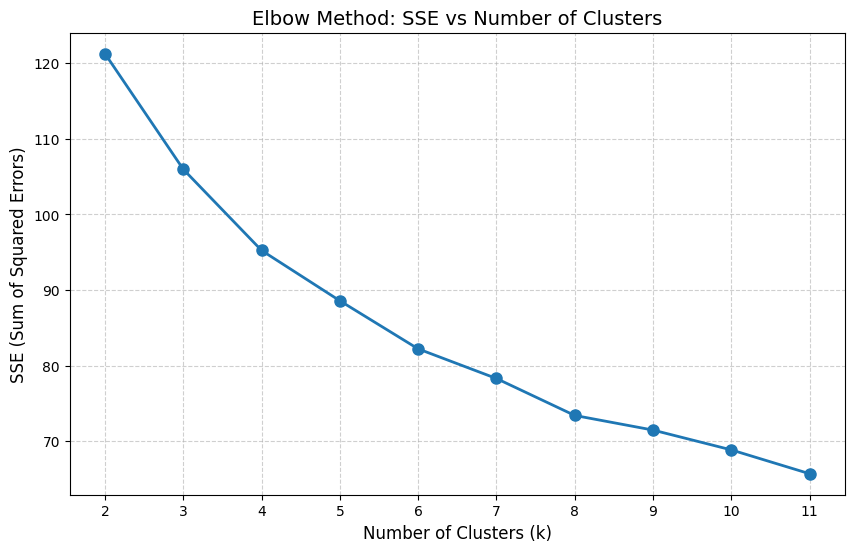

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('diabetes.csv')

x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_normalized)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('SSE (Sum of Squared Errors)', fontsize=12)
plt.title('Elbow Method: SSE vs Number of Clusters', fontsize=14)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

2.

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

kmeans = KMeans(n_clusters=6, max_iter=500, random_state=42)
cluster_labels = kmeans.fit_predict(X_normalized)

df_clusters = pd.DataFrame({'Cluster': cluster_labels, 'True_Label': y})

cluster_to_class = df_clusters.groupby('Cluster')['True_Label'].agg(lambda x: x.value_counts().index[0])
print("Classe majoritária em cada cluster:")
print(cluster_to_class)

y_pred = df_clusters['Cluster'].map(cluster_to_class)

cm = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


Classe majoritária em cada cluster:
Cluster
0    1
1    0
2    0
3    0
4    0
5    1
Name: True_Label, dtype: int64

Confusion Matrix:
 [[390 110]
 [119 149]]

Accuracy: 0.7018
Precision: 0.5753
Recall: 0.5560
F1-score: 0.5655


O modelo obtido apresenta uma accuracy de aproximadamente 0.70, o que indica que cerca de 70% das observações foram corretamente classificadas. No entanto, a precisão, o recall e o F1-score estão em torno de 0.56, o que revela um desempenho moderado e um certo desequilíbrio entre as classes. Embora o K-Means tenha conseguido identificar alguns padrões nos dados, o seu desempenho como classificador é limitado, pois se trata de um método de aprendizagem não supervisionada que não utiliza as classes verdadeiras durante o treino. Além disso, o K-Means assume que os grupos formados são esféricos e bem separados, o que nem sempre acontece em dados reais como os de diabetes. Por essa razão, os clusters podem conter amostras de ambas as classes, levando a erros de classificação.

3.

In [24]:
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
print("\nCluster centers:")
print(centers_df.round(3).T)

class_distribution = df_clusters.groupby('Cluster')['True_Label'].value_counts().unstack(fill_value=0)

print("\nClass distribution per cluster:")
for cluster_id in class_distribution.index:
    total = class_distribution.loc[cluster_id].sum()
    class_0_pct = (class_distribution.loc[cluster_id][0] / total) * 100
    class_1_pct = (class_distribution.loc[cluster_id][1] / total) * 100
    print(f"Cluster {cluster_id}: \n Class 0: {class_0_pct:.1f}%, Class 1: {class_1_pct:.1f}%")

class_distribution['Purity'] = class_distribution.max(axis=1) / class_distribution.sum(axis=1)

top_3_clusters = class_distribution.sort_values('Purity', ascending=False).head(3)

print("\nTop 3 discriminative clusters:")
for cluster_id in top_3_clusters.index:
    majority_class = class_distribution.loc[cluster_id][:-1].idxmax()
    print(f"\nCluster {cluster_id} (Purity: {class_distribution.loc[cluster_id]['Purity']:.1%})")
    print(f"   Majority class: {majority_class} ({'No Diabetes' if majority_class == 0 else 'Diabetes'})")
    print(f"   Cluster center characteristics:")
    center = centers_df.loc[cluster_id]
    for feature, value in center.items():
        print(f"     {feature}: {value:.3f}")


Cluster centers:
                              0      1      2      3      4      5
Pregnancies               0.111  0.104  0.350  0.213  0.283  0.502
Glucose                   0.751  0.498  0.679  0.592  0.618  0.653
BloodPressure             0.610  0.549  0.659  0.000  0.604  0.628
SkinThickness             0.345  0.239  0.052  0.015  0.017  0.320
Insulin                   0.248  0.069  0.010  0.000  0.011  0.143
BMI                       0.552  0.447  0.440  0.383  0.474  0.511
DiabetesPedigreeFunction  0.233  0.148  0.139  0.133  0.142  0.196
Age                       0.135  0.070  0.597  0.162  0.196  0.381

Class distribution per cluster:
Cluster 0: 
 Class 0: 45.5%, Class 1: 54.5%
Cluster 1: 
 Class 0: 90.7%, Class 1: 9.3%
Cluster 2: 
 Class 0: 62.3%, Class 1: 37.7%
Cluster 3: 
 Class 0: 54.3%, Class 1: 45.7%
Cluster 4: 
 Class 0: 59.2%, Class 1: 40.8%
Cluster 5: 
 Class 0: 39.2%, Class 1: 60.8%

Top 3 discriminative clusters:

Cluster 1 (Purity: 90.7%)
   Majority class: 0 (No

Os resultados mostram diferenças marcantes entre alguns clusters, tanto na composição das classes como nas características médias dos pacientes.

O cluster 1 é o mais claramente discriminativo, com predominância de pacientes sem diabetes (classe 0, 90.7%), indicando um grupo de indivíduos predominantemente saudáveis. Este grupo apresenta os valores médios mais baixos de glicose, insulina e índice de massa corporal (BMI), coerentes com um perfil de menor risco de diabetes.

O cluster 5, por outro lado, é dominado por pacientes com diabetes (classe 1, 60.8%), apresentando valores médios mais elevados de número de gravidezes, glicose, insulina, BMI e idade, o que sugere um grupo de maior risco, composto por indivíduos mais velhos e com sinais de resistência à insulina.

O cluster 2 apresenta uma predominância de pacientes sem diabetes (classe 0, 62.3%), com valores médios moderados de glicose e insulina, e um BMI ligeiramente elevado, representando um grupo intermédio, com algum risco, mas ainda predominantemente saudável.

Em geral vemos que o cluster 1 representa pacientes saudáveis, o cluster 2 pacientes com risco moderado, e o cluster 5 pacientes de alto risco.

PART B

1.

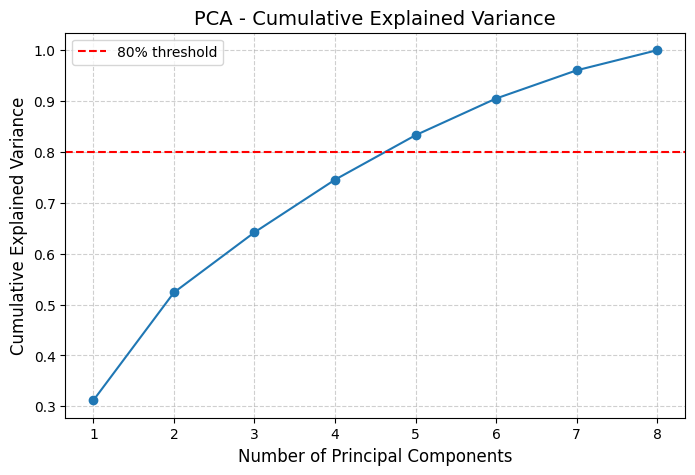

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_normalized)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA - Cumulative Explained Variance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

Devem ser retidos 5 componentes para explicar pelo menos 80% da variancia total.

2.


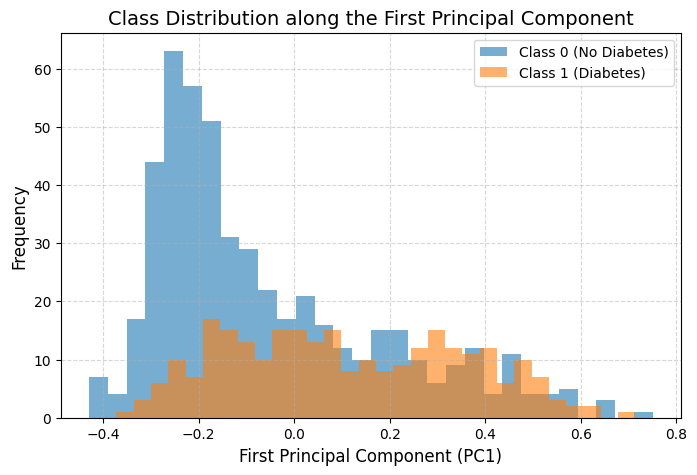

In [26]:
X_pca = pca.transform(X_normalized)
pc1 = X_pca[:, 0]

df_pca = pd.DataFrame({'PC1': pc1, 'Outcome': y})

plt.figure(figsize=(8, 5))
plt.hist(df_pca[df_pca['Outcome'] == 0]['PC1'], bins=30, alpha=0.6, label='Class 0 (No Diabetes)')
plt.hist(df_pca[df_pca['Outcome'] == 1]['PC1'], bins=30, alpha=0.6, label='Class 1 (Diabetes)')
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Distribution along the First Principal Component', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


O gráfico mostra que as duas classes têm distribuições parcialmente sobrepostas ao longo do primeiro componente principal. A classe 0 (sem diabetes) concentra-se mais nos valores negativos do PC1, enquanto a classe 1 (com diabetes) tende a apresentar valores de PC1 mais diversificados. Isto indica que o primeiro componente principal capta alguma informação relacionada com a presença de diabetes, mas não é suficiente para separar completamente as duas classes. Há uma zona de sobreposição considerável, o que significa que o PC1 combina variáveis que distinguem parcialmente os grupos, mas não de forma definitiva. Assim, o PC1 tem algum poder discriminativo, refletindo diferenças gerais entre pacientes saudáveis e diabéticos, embora seja necessário considerar mais componentes ou um modelo supervisionado para uma separação mais clara.

3.

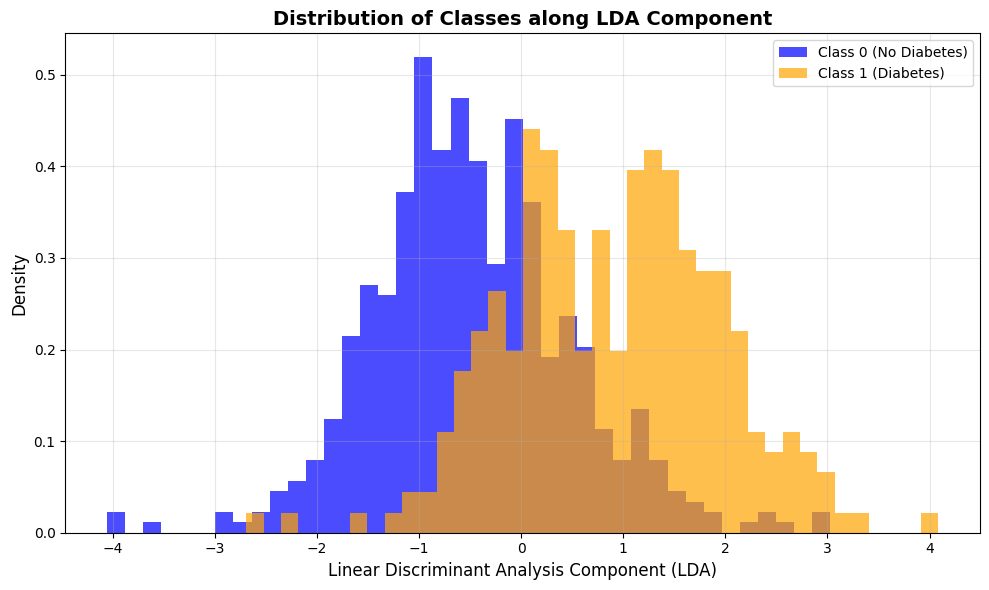

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_normalized, y)

df_lda = pd.DataFrame({'LDA_Component': X_lda[:, 0], 'Outcome': y})

class_0_lda = df_lda[df_lda['Outcome'] == 0]['LDA_Component']
class_1_lda = df_lda[df_lda['Outcome'] == 1]['LDA_Component']

plt.figure(figsize=(10, 6))
plt.hist(class_0_lda, bins=40, alpha=0.7, label='Class 0 (No Diabetes)', color='blue', density=True)
plt.hist(class_1_lda, bins=40, alpha=0.7, label='Class 1 (Diabetes)', color='orange', density=True)
plt.xlabel('Linear Discriminant Analysis Component (LDA)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Classes along LDA Component', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


A distribuição das classes ao longo do componente LDA mostra uma separação clara entre os indivíduos com e sem diabetes. A Classe 0 (Sem Diabetes) está concentrada principalmente em valores negativos do componente, enquanto a Classe 1 (Diabetes) tende a ocupar valores positivos. Há alguma sobreposição em torno de zero, o que indica que alguns indivíduos não são perfeitamente discrimináveis apenas com este componente. No geral, o LDA conseguiu capturar bem a diferença entre as duas classes, mostrando que o componente gerado pode ser eficaz para classificação.

4.

Entre PCA e LDA, o LDA é mais apropriado para construir uma regra discriminante. Isto deve-se ao facto de o LDA ser um método supervisionado, ou seja, utiliza a informação das classes durante a construção do componente, maximizando a separação entre as classes. O gráfico da distribuição ao longo do componente LDA mostra uma distinção muito mais clara entre os indivíduos com e sem diabetes, com menor sobreposição, enquanto o PCA, sendo um método não supervisionado, apenas captura a variância total dos dados e não garante que essa variância coincida com a separação das classes. Assim, o LDA oferece maior poder discriminativo para classificação, tornando-o mais adequado para construir uma regra discriminante eficaz.